In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# Load datasets

# path of dataset
path = '/content/diabetes.csv'

df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [343]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [344]:
df[df['Outcome'] == 1]['Age'].mean()

np.float64(37.06716417910448)

In [345]:
df[df['Outcome'] == 1]['Pregnancies'].max()

17

In [346]:
from sklearn import preprocessing

features = df.drop(['Outcome'], axis=1)

# scaler
standarizer = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(standarizer.fit_transform(features), columns=features.columns)
# add the columns Outcome to scaled features dataframe
df_scaled['Outcome'] = df['Outcome']

df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [347]:
# sns.pairplot(df_scaled)

<Axes: >

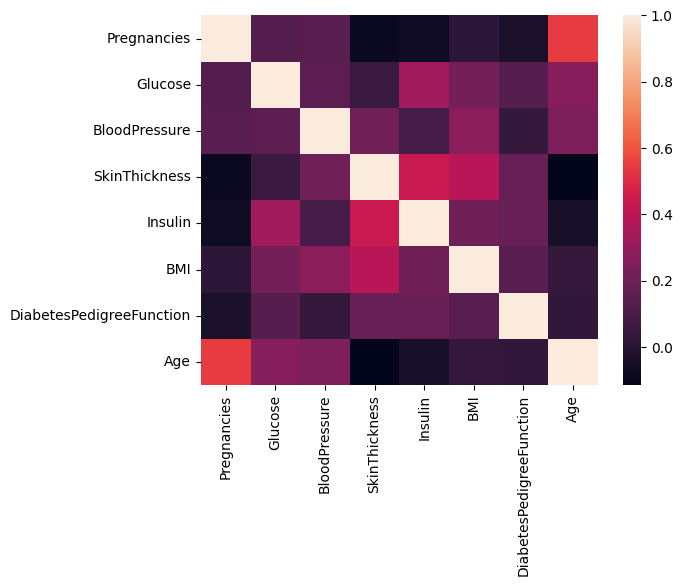

In [348]:
# correlation matrix
sns.heatmap(features.corr())

In [349]:
# input and output sepration

# features
X = df_scaled.drop(['Outcome'], axis=1).values

# labels
y = df_scaled['Outcome'].values

n_samples = X.shape[0]

# add a column of 1s , to add biad in w vector
X = np.hstack((np.ones((n_samples,1)), X))

n_features = X.shape[1]

# weights vector
w =np.zeros(n_features)

In [350]:
# use train test method and split data
from sklearn.model_selection import train_test_split

# create train and
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=42)

n_train_samples = X_train.shape[0]
n_test_samples = X_test.shape[0]

X_train.shape , X_test.shape

((537, 9), (231, 9))

In [351]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [352]:
def cost_function(X, y, n_samples, w):

  cost = 0
  # use linear model and sigmoid function
  # sigmoid work between 0 and 1
  model = sigmoid(np.dot(X, w))     # a vector in size of  n_samples
  error = model - y                 #  find error for each samples
  cost = np.sum(error ** 2)
  cost = cost / n_samples
  return cost

In [353]:
cost_function(X_train, y_train, n_train_samples, w)

np.float64(0.25)

In [354]:
def gradient_descent(X, y, w, n_samples, epoch):

  # save cost for each iteration on epoch
  cost_array = []
  accuracy_array = []   # to keep each accuracy for each epoch

  for e in range(epoch):
    y_model = sigmoid(np.dot(X, w))
    error = y_model - y
    dj_dw = (np.dot(X.T, error)) / n_samples    # derivative of cost respect to w
    w = w - alpha * dj_dw                       # update value of w for every baby step
    cost_array.append(cost_function(X, y, n_samples, w))     # calculate costs for each epoch and add to list

    # calculate accuracy
    y_pred = np.where(y_model >= 0.5 , 1, 0)
    accuracy = (y_pred == y).mean()
    accuracy_array.append(accuracy)

  return w , cost_array , accuracy_array

In [355]:
epoch = 100

# learning rate
alpha = 0.07

w , costs , accuracies = gradient_descent(X_train, y_train, w, n_train_samples, epoch)


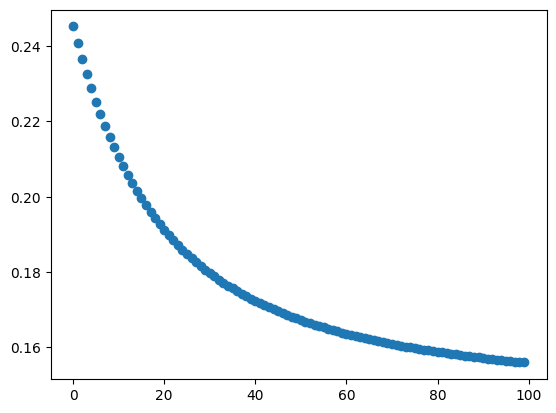

In [356]:
plt.scatter(range(epoch) , costs)

(Text(0.5, 0, 'epochs'), Text(0, 0.5, 'accuracy'))

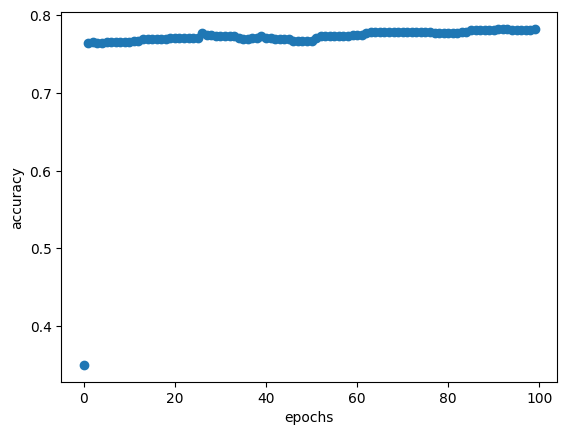

In [357]:
# Accuracy vs Epochs
plt.scatter(range(epoch), accuracies)
plt.xlabel("epochs") , plt.ylabel("accuracy")

In [358]:
from sklearn.linear_model import LogisticRegression

# create logistic regression
classifier = LogisticRegression()

# train model
classifier.fit(X_train,y_train)

w_sklearn = classifier.coef_

# print w for 2 methods
print("print w for all data without test and train\n" )
print("w_sklearn : " , w_sklearn , "\n")
print("w_gradient " , w)

print w for all data without test and train

w_sklearn :  [[ 0.0105539   0.1940828   1.12254197 -0.1988906  -0.02323601 -0.10639937
   0.83785254  0.13884427  0.41623433]] 

w_gradient  [-0.53947905  0.1919958   0.69273109 -0.00790666 -0.0025421   0.05738961
  0.46885927  0.1503363   0.31564085]


In [359]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# predict y for test samples use 2 methods
# sklearn functions to predict y
y_predict_sklearn = classifier.predict(X_test)

# gradient descent to predic ty
y_predict_gradient = sigmoid(np.dot(X_test,w))
y_predict_gradient = np.where(y_predict_gradient >= 0.5, 1, 0)

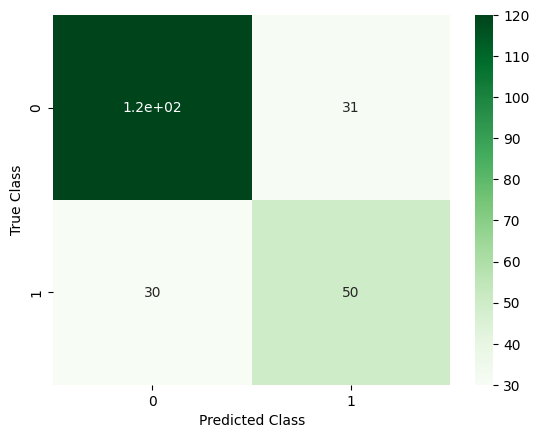

In [360]:
# create confussion matrix  for y predict from sklearn
confusion_mat_sklearn = confusion_matrix(y_test, y_predict_sklearn)

# create pandas dataframe
df_matrix_sklearn = pd.DataFrame(confusion_mat_sklearn, index = classifier.classes_ , columns = classifier.classes_)

sns.heatmap(df_matrix_sklearn, annot=True, cmap='Greens')
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [361]:
confusion_mat_sklearn

array([[120,  31],
       [ 30,  50]])

In [362]:
# calculate accuracy
accuracy = (confusion_mat_sklearn[0,0] + confusion_mat_sklearn[1,1]) / np.sum(confusion_mat_sklearn)
accuracy

np.float64(0.7359307359307359)

In [363]:
from sklearn.model_selection import cross_val_score

print ("accuracy: " , cross_val_score(classifier, X, y, cv=5, scoring='accuracy'), "\n")
print ("precision: " , cross_val_score(classifier, X, y, cv=5, scoring='precision'), "\n")
print ("recall: " , cross_val_score(classifier, X, y, cv=5, scoring='recall'), "\n")
print("f1: " , cross_val_score(classifier, X, y, cv=5, scoring='f1'), "\n")

accuracy:  [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588] 

precision:  [0.71111111 0.64705882 0.71052632 0.79069767 0.71794872] 

recall:  [0.59259259 0.61111111 0.5        0.64150943 0.52830189] 

f1:  [0.64646465 0.62857143 0.58695652 0.70833333 0.60869565] 



<Axes: >

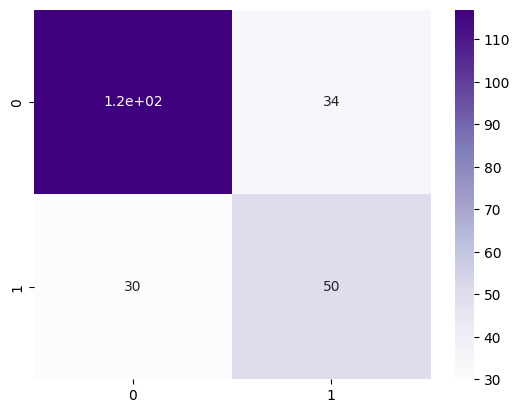

In [364]:
# create confussion matrix  for y predict from gradient descent
confusion_mat_gradient = confusion_matrix(y_test, y_predict_gradient)

# create pandas dataframe
df_matrix_gradient = pd.DataFrame(confusion_mat_gradient, index = classifier.classes_ , columns = classifier.classes_)

sns.heatmap(df_matrix_gradient, annot=True, cmap='Purples')

In [365]:
(confusion_mat_gradient[0,0] + confusion_mat_gradient[1,1]) / np.sum(confusion_mat_gradient)

np.float64(0.7229437229437229)

In [366]:
# support vector machine
from sklearn.svm import SVC

# set randomization sit
np.random.seed(0)

# create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state =0, gamma=1, C=1)

# train the clasxsifier
model_svm = svc.fit(X, y)

In [367]:
# get support vectors
model_svm.support_vectors_

array([[ 1.        , -0.84488505, -1.12339636, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.        ,  0.3429808 , -0.15318486, ..., -0.81134119,
        -0.81807858, -0.27575966],
       [ 1.        ,  1.82781311, -0.184482  , ...,  0.41977549,
        -1.02042653, -0.36084741],
       ...,
       [ 1.        ,  0.63994726,  2.1628039 , ...,  0.44515934,
        -0.58552944,  2.78739945],
       [ 1.        ,  1.53084665,  1.53686099, ...,  1.52397292,
        -0.20801461,  0.83038113],
       [ 1.        , -0.84488505,  0.1597866 , ..., -0.24020459,
        -0.37110101,  1.17073215]])

In [368]:
# get indices of support vectors
model_svm.support_

array([  1,   5,   7,  12,  18,  20,  28,  29,  30,  33,  34,  35,  36,
        40,  41,  42,  44,  46,  47,  49,  50,  54,  57,  58,  59,  60,
        62,  63,  65,  67,  69,  71,  73,  75,  76,  77,  80,  81,  82,
        85,  86,  90,  91,  92,  94,  95,  97,  98, 101, 102, 104, 105,
       106, 107, 108, 113, 117, 121, 123, 126, 127, 133, 134, 135, 136,
       138, 139, 140, 141, 144, 145, 146, 147, 148, 150, 151, 153, 156,
       160, 161, 162, 166, 167, 168, 169, 172, 173, 176, 178, 180, 181,
       182, 183, 184, 191, 194, 200, 201, 202, 204, 205, 211, 212, 217,
       222, 223, 225, 226, 228, 229, 232, 233, 239, 241, 244, 246, 247,
       248, 249, 250, 253, 256, 257, 258, 260, 262, 263, 265, 267, 268,
       272, 273, 274, 275, 278, 279, 281, 282, 285, 286, 289, 290, 294,
       295, 297, 299, 304, 310, 311, 313, 320, 324, 325, 327, 329, 330,
       331, 333, 335, 336, 340, 341, 342, 343, 344, 345, 346, 347, 350,
       351, 352, 354, 358, 361, 362, 364, 365, 368, 371, 372, 37

In [369]:
# get number of support vectors for each class
model_svm.n_support_

array([383, 265], dtype=int32)

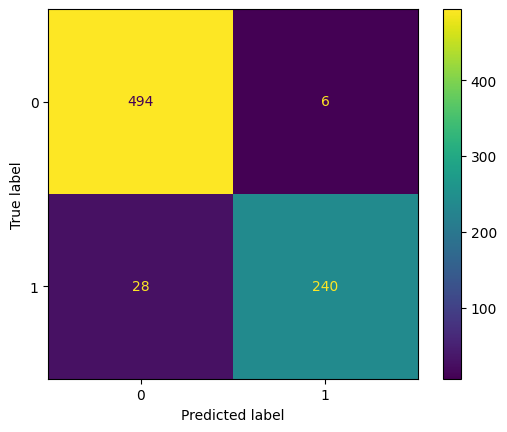

In [370]:
from sklearn.metrics import ConfusionMatrixDisplay

y_predict_svm = model_svm.predict(X)
matrix_svm = confusion_matrix(y, y_predict_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_svm)
disp.plot()

In [372]:
# evalluation of SVM
print ("accuracy SVM: " , cross_val_score(model_svm, X, y, cv=5, scoring='accuracy').mean(), "\n")
print ("precision SVM: " , cross_val_score(model_svm, X, y, cv=5, scoring='precision'), "\n")
print ("recall SVM: " , cross_val_score(model_svm, X, y, cv=5, scoring='recall'), "\n")
print("f1 SVM: " , cross_val_score(model_svm, X, y, cv=5, scoring='f1'), "\n")

accuracy SVM:  0.7109837874543757 

precision SVM:  [0.63636364 0.59459459 0.62962963 0.84       0.60714286] 

recall SVM:  [0.38888889 0.40740741 0.31481481 0.39622642 0.32075472] 

f1 SVM:  [0.48275862 0.48351648 0.41975309 0.53846154 0.41975309] 

